## Series Temporales con quandl & Facebook Prophet

La predicción de series temporales puede ser algo complejo. Esta tarea se facilita con el paquete Prophet de facebook. A continuación, vamos a explorar las acciones de la empresa Tesla (TSLA) del 2011 al 2018. Vamos a ver lo sencillo que es crear una proyección para el 2019.

Para descargar los datos de TESLA, lo podemos hacer a traves del API de quandl. Obtener un key es gratuito y podemos realizarlo en https://www.quandl.com/. Para obtener una llave sin costo, registrese como estudiante con su cuenta de ucenfotec. Debe activar el link en su correo para que funcione.

In [4]:
quandl_key = 'mzbz-NvFsKvi5nu9uZ4x'
#!pip3 install quandl

In [5]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# obtener acciones de TESLA de quandl
quandl.ApiConfig.api_key = quandl_key
data = quandl.get('WIKI/TSLA')

data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


### Cargar los datos de TESLA 

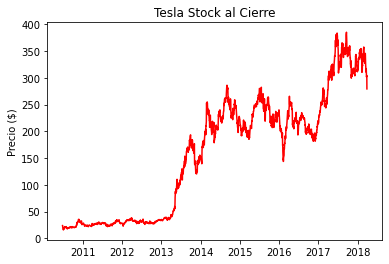

In [7]:
plt.plot(data.index, data['Adj. Close'], 'r')
plt.title('Tesla Stock al Cierre')
plt.ylabel('Precio ($)');
plt.show();

### Instalar Prophet y crear el dataframe

In [11]:
# https://facebook.github.io/prophet/docs/quick_start.html
# https://en.wikipedia.org/wiki/Additive_model
#!pip3 install convertdate 
#!pip3 install lunarcalendar
#!pip3 install holidays
#!pip3 install fbprophet
import fbprophet as pf

In [12]:
# vamos a crear un nuevo dataframe para simplificar el analisis
tesla = pd.DataFrame({'ds': data.index.values, 'y': data['Adj. Close']})
tesla.head()

,ds,y
Date,,
2010-06-29,2010-06-29,23.89
2010-06-30,2010-06-30,23.83
2010-07-01,2010-07-01,21.96
2010-07-02,2010-07-02,19.20
2010-07-06,2010-07-06,16.11


In [13]:
# si hay error upgrade pystan 2.19.1.1
# model fitting!
m = pf.Prophet(daily_seasonality=True)
m.fit(tesla)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [14]:
# vamos a crear la prediccion a futuro con intervalos de confianza.
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2309,2019-03-23,475.767552,435.277581,512.050851
2310,2019-03-24,476.452131,433.204154,514.748176
2311,2019-03-25,475.587885,433.821934,513.910218
2312,2019-03-26,476.408369,438.300387,516.973908
2313,2019-03-27,477.536072,437.554372,517.375754


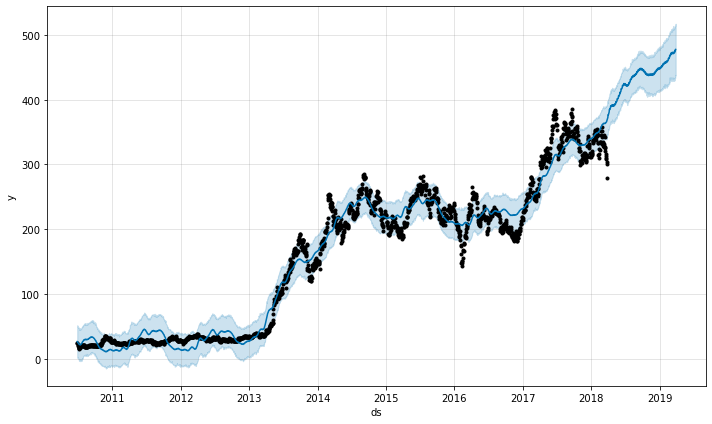

In [15]:
fig = m.plot(forecast)

### Desplegar Prediccion y Componentes

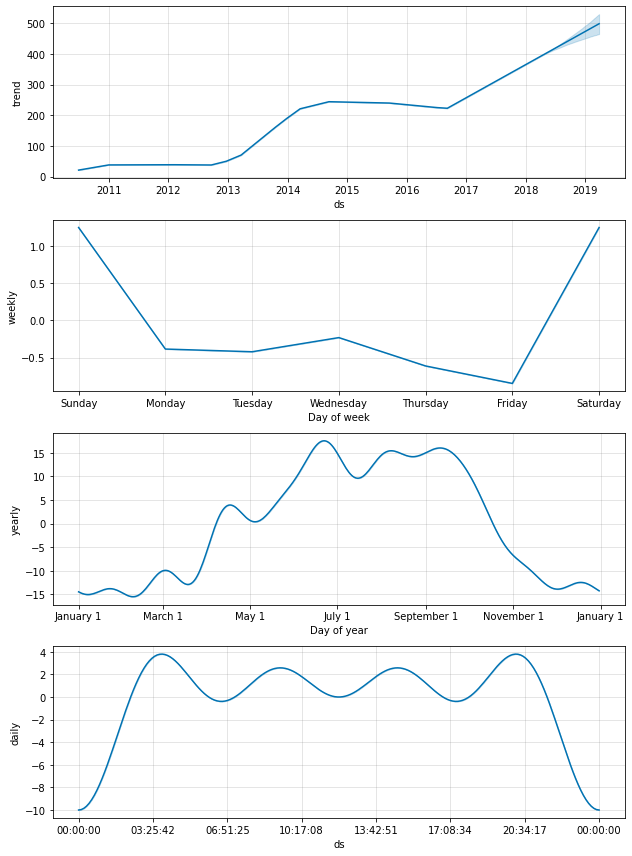

In [16]:
fig2 = m.plot_components(forecast)

### Visualizacion Interactiva con Plotly

In [ ]:
!pip3 install plotly

     |████████████████████████████████| 13.1 MB 3.9 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=5b39c9eda92865907c9d5a7b4d826770c1a0d947c6127210b320380ee3961cb8
  Stored in directory: /Users/oscar/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [17]:


from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

NameError: name 'go' is not defined

In [ ]:
# componentes intectactivos con plotly
plot_components_plotly(m, forecast)

## Resampling & Rolling Windows

In [ ]:
resample_weekly = data['Adj. Close'].resample('Y').mean()

plt.plot(tesla.index, data['Adj. Close'], 'r')
plt.plot(resample_weekly)
plt.title('Tesla Stock al Cierre (Resampled)')
plt.ylabel('Precio ($)');
plt.show();

In [ ]:
window_365d = data['Adj. Close'].rolling(window=100, center=True).mean()

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(window_365d)
plt.title('Tesla Stock al Cierre (Rolling Window)')
plt.ylabel('Precio ($)');
plt.show();

## Auto-Regression

El método de autorregresión (AR) modela el siguiente paso en la secuencia como una función lineal de las observaciones en los pasos de tiempo anteriores.

La notación del modelo implica especificar el orden del modelo p como parámetro de la función AR, p. Ej. AR (p). Por ejemplo, AR (1) es un modelo de autorregresión de primer orden.

El método es adecuado para series de tiempo univariadas sin tendencia ni componentes estacionales.

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7252143f217525cfbf556ff59ebafacf13e638cb" />

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html

from statsmodels.tsa.ar_model import AutoReg
x = data['Adj. Close'].values

# modelo
model = AutoReg(x, lags=1, seasonal=True, period=365)
model_fit = model.fit()

# prediccion
predict = model_fit.predict(
    start=len(x), 
    end=len(x) + len(x)-1, 
    dynamic=True)

plt.plot(data.index, data['Adj. Close'], 'r')
plt.plot(data.index, predict)
plt.title('Tesla Stock al Cierre (Prediccion: AR)')
plt.ylabel('Precio ($)');
plt.show();